### Use Tbats to predict weekly store footfall
1. Transform Index to have a weekly frequency. Use "W"
2. Visualize data. Something will be off :)
3. Create training set and test set. Test Set should be 5 weeks.
4. Create Tbats Model
5. Predict 5 weeks and visualize them, together with training and test set.
6. Assess Model based on RMSE


# IMPORTANDO Y CARGANDO LAS LIBRERIAS

---





In [2]:
#IMPORTAMOS LAS LIBRERIAS
import pandas as pd
import numpy as np

In [3]:
%cd C:\Users\leoma\Desktop\projects\Modelos-de-Pronosticos-Series-Temporales-Python\TBATS

c:\Users\leoma\Desktop\projects\Modelos-de-Pronosticos-Series-Temporales-Python\TBATS


In [18]:
#OBTENEMOS LOS DATOS
df = pd.read_csv("daily-footfall.csv",
                   index_col="WeekBeginning")
df.head()

,AveragePerDay
WeekBeginning,
3/1/2016,235
10/1/2016,231
17/01/2016,233
24/01/2016,224
31/01/2016,224


Con parse_dates, podemos ver que todas las fechas están mezcladas

In [19]:
# Index
df.index = pd.to_datetime(df.index,
                          format="%d/%m/%Y")
df.index

DatetimeIndex(['2016-01-03', '2016-01-10', '2016-01-17', '2016-01-24',
               '2016-01-31', '2016-02-07', '2016-02-14', '2016-02-21',
               '2016-02-28', '2016-03-06',
               ...
               '2017-10-22', '2017-10-29', '2017-11-05', '2017-11-12',
               '2017-11-19', '2017-11-26', '2017-12-03', '2017-12-10',
               '2017-12-17', '2017-12-24'],
              dtype='datetime64[ns]', name='WeekBeginning', length=103, freq=None)

# TRANSFORMACIÓN DE LOS DATOS

In [20]:
#Le decimos a python hey mi conjunto de datos es esta frecuencia diaria
# Esto es muy importante, cuando los modelos lean nuestra variable independiente, sabrán que hablamos de frecuencia diaria
df = df.asfreq("W")
df.index

DatetimeIndex(['2016-01-03', '2016-01-10', '2016-01-17', '2016-01-24',
               '2016-01-31', '2016-02-07', '2016-02-14', '2016-02-21',
               '2016-02-28', '2016-03-06',
               ...
               '2017-10-22', '2017-10-29', '2017-11-05', '2017-11-12',
               '2017-11-19', '2017-11-26', '2017-12-03', '2017-12-10',
               '2017-12-17', '2017-12-24'],
              dtype='datetime64[ns]', name='WeekBeginning', length=104, freq='W-SUN')

# VISUALIZACIÓN

<AxesSubplot: xlabel='WeekBeginning'>

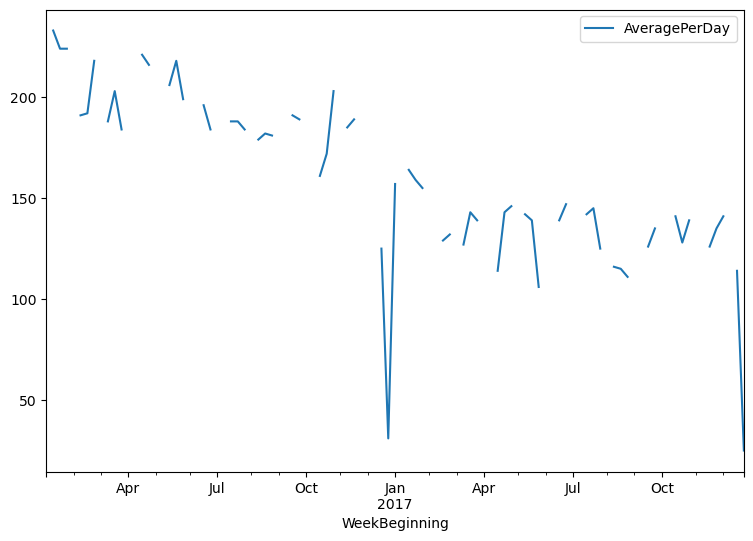

In [17]:
#Visualization
# podemos ver cierta estacionalidad (lo cual es algo que esperariamos en el alquiler de bicicletas), tambien podemos ver cierta tendencia creciente y el valor promedio aumenta con el tiempo.
# Otra cosa que podemos apreciar es la oscilacion tan grande en ciertos dias ej: de 4k a 8k
df.plot(figsize = (9,6))

In [21]:
# fill NA
df = df.fillna(method = 'ffill')

<AxesSubplot: xlabel='WeekBeginning'>

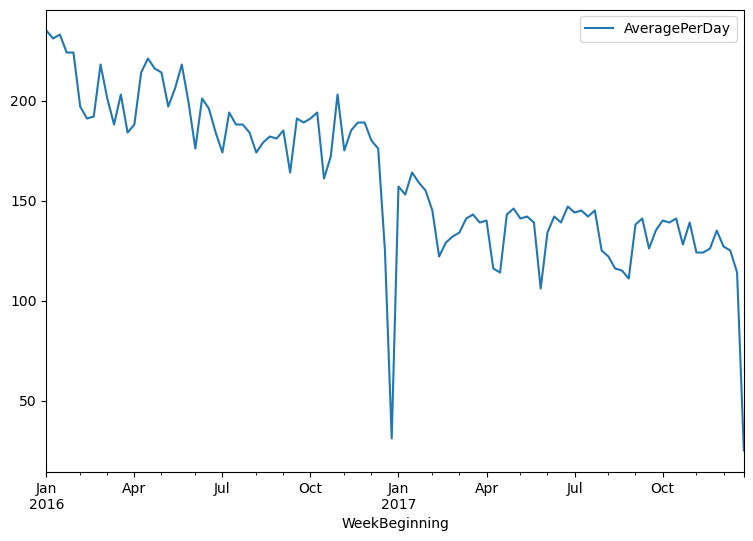

In [22]:
#viz
df.plot(figsize = (9,6))

# CONJUNTO DE ENTRENAMIENTO Y PRUEBAS

In [24]:
test_weeks = 5
training_set = df.iloc[:-test_weeks, :]
test_set = df.iloc[-test_weeks:, :]
test_set.head(1)

,AveragePerDay
WeekBeginning,
2017-11-26,135.0


# FORECASTING MODEL

In [27]:
# Librerias
from tbats import TBATS 

In [30]:
# forescasting model
model = TBATS(seasonal_periods = [52]).fit(training_set.AveragePerDay)


In [35]:
# Predictions
predictions = model.forecast(steps = test_weeks)
predictions

array([142.42104699, 149.63773854, 111.37706175,  51.80494376,
        39.87986392])

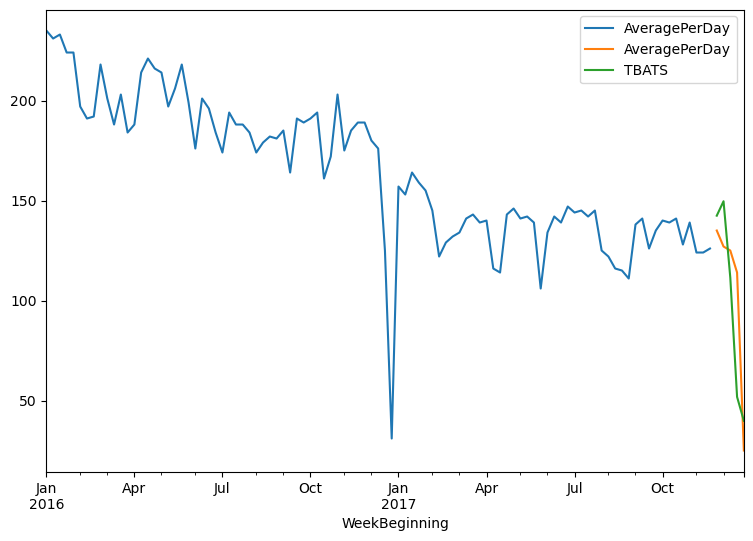

In [45]:
# visualization
training_set['AveragePerDay'].plot(figsize=(9,6),legend=True)
test_set['AveragePerDay'].plot(legend=True)
predictions.plot(legend = True);

In [49]:
# MAE and RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error
#print(round (mean_absolute_error(test_set['AveragePerDay'], predictions),0))
print(round(np.sqrt(mean_squared_error(test_set['AveragePerDay'], predictions)), 0))

31.0


En Promedio la cantidad promedio es de 170, y tenemos un error de prediccion de 31